In [46]:
import pandas as pd
import numpy as np

In [47]:
import sys
print(sys.executable)

/mnt/d/Machine_Learning_Education/Projects/kaggle_titanic/.venv/bin/python3


In [48]:
import sys, platform
print(sys.executable)
print(platform.system())

/mnt/d/Machine_Learning_Education/Projects/kaggle_titanic/.venv/bin/python3
Linux


In [49]:
import sys, sklearn, xgboost
print(sys.executable)
print("sklearn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)

/mnt/d/Machine_Learning_Education/Projects/kaggle_titanic/.venv/bin/python3
sklearn: 1.7.2
xgboost: 3.1.2


In [50]:
# Load competition datasets
train = pd.read_csv("../data/raw/train.csv")
test  = pd.read_csv("../data/raw/test.csv")

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

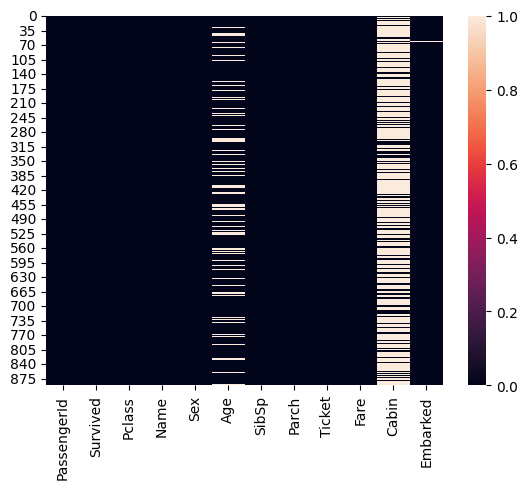

In [53]:
import seaborn as sns
train.isnull().sum()
sns.heatmap(train.isnull(), )

Text(0.5, 1.0, 'Missing Data % per Column')

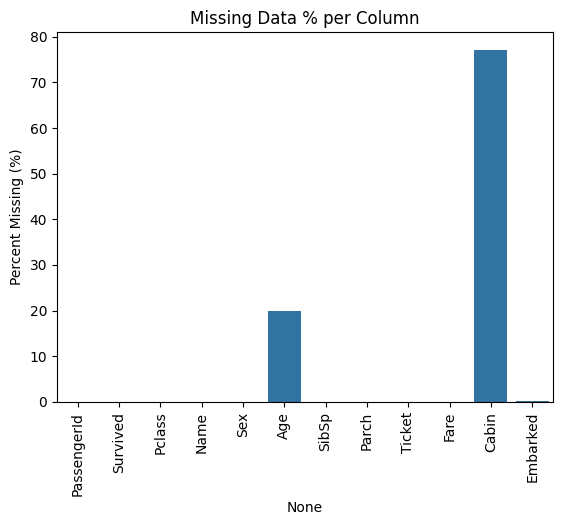

In [54]:
import matplotlib.pyplot as plt
null_pct = train.isnull().mean()*100
null_pct

plt.figure()
sns.barplot(x=null_pct.index, y=null_pct)
plt.xticks(rotation=90)
plt.ylabel("Percent Missing (%)")
plt.title("Missing Data % per Column")


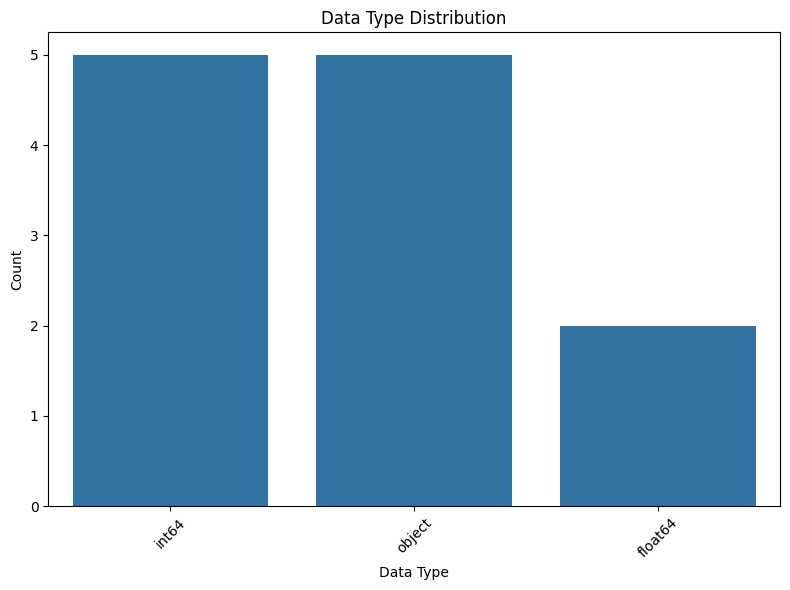

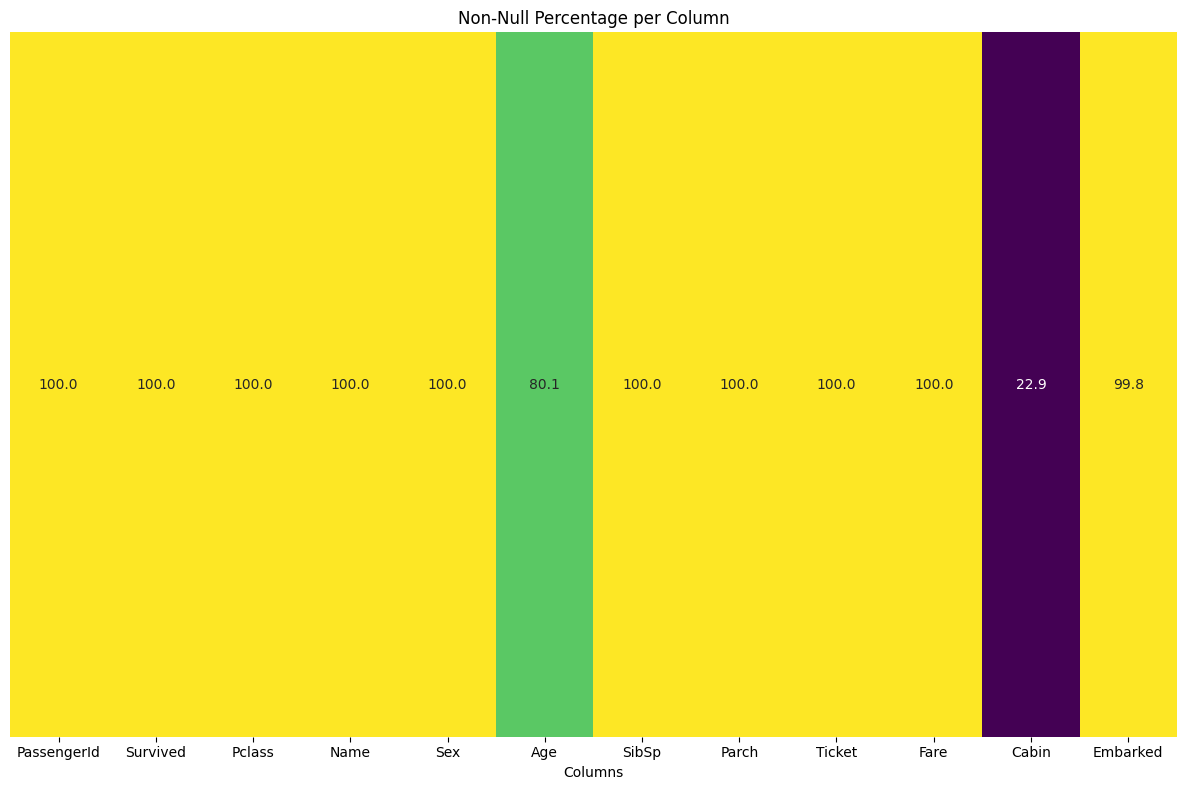

In [55]:
import seaborn as sns

def visualize_train_info(train_df):
    """
    Visualizes the output of train_df.info() using Seaborn.
    Args:
        train_df (pd.DataFrame): The DataFrame to visualize.
    """
    # 1. Data Type Counts (Bar Plot)
    dtype_counts = train_df.dtypes.value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=dtype_counts.index, y=dtype_counts.values)
    plt.title('Data Type Distribution')
    plt.xlabel('Data Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # Display the plot

    # 2. Non-Null Counts (Heatmap)
    non_null_counts = train_df.isnull().sum()
    total_rows = len(train_df)
    non_null_percentages = (total_rows - non_null_counts) / total_rows * 100
    plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
    sns.heatmap(non_null_percentages.to_frame().T, annot=True, fmt=".1f", cmap="viridis", cbar=False)
    plt.title('Non-Null Percentage per Column')
    plt.xlabel('Columns')
    plt.ylabel('')  # Remove the y-axis label
    plt.yticks([])  # Remove the y-axis ticks
    plt.tight_layout()
    plt.show()  # Display the plot

visualize_train_info(train)

In [56]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Text(0.5, 0, 'Data Types')

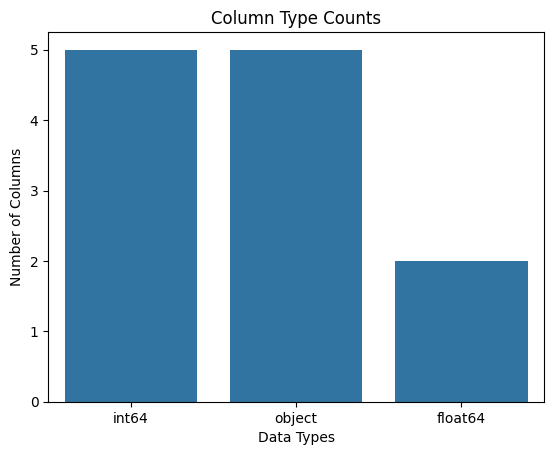

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count column types
type_counts = train.dtypes.value_counts()
type_counts

plt.figure()
sns.barplot(x=type_counts.index.astype(str), y=type_counts)
plt.title("Column Type Counts")
plt.ylabel("Number of Columns")
plt.xlabel("Data Types")


Text(0, 0.5, 'Correlation Coefficient')

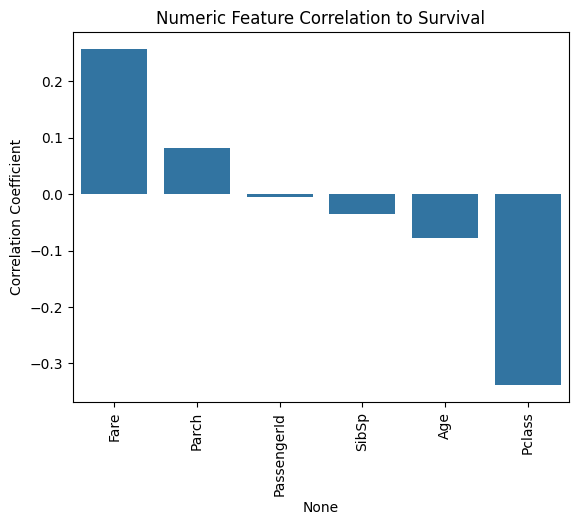

In [58]:
import numpy as np
corr_survive = train.select_dtypes(include=[np.number]).corr()['Survived'].drop('Survived')
corr_survive = corr_survive.sort_values(ascending=False)

plt.figure()
corr_survive
sns.barplot(x=corr_survive.index, y=corr_survive)
plt.xticks(rotation=90)
plt.title("Numeric Feature Correlation to Survival")
plt.ylabel("Correlation Coefficient")


In [59]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [62]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [63]:
train.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [64]:
# Here we are feature engineering. the 1 represents the individual plus their sibblings, parents or children.
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # the one represents the individual
train.groupby("FamilySize")["Survived"].mean()


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

<Axes: >

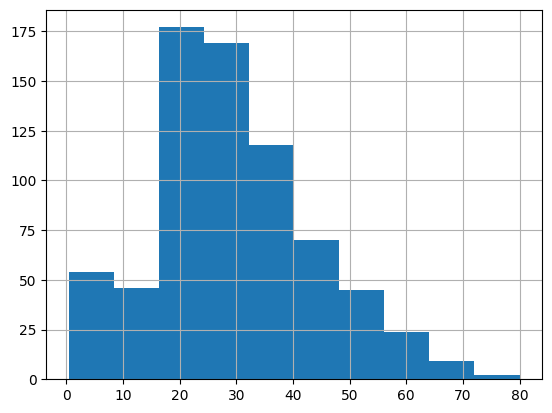

In [65]:
train['Age'].hist()

<Axes: >

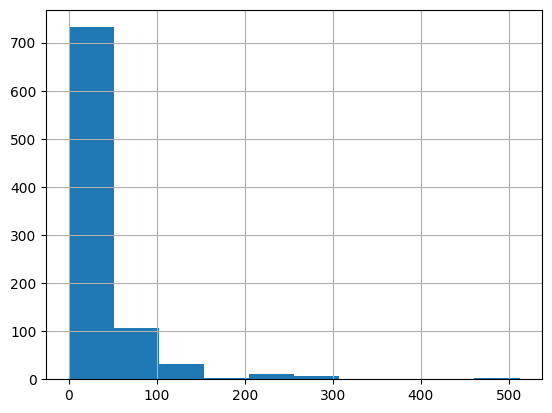

In [66]:
train['Fare'].hist()

In [67]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [68]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [69]:
# Get percentage of passengers by embarkation port
train['Embarked'].value_counts(normalize=True) * 100

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

In [70]:
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train.groupby("Title")["Survived"].mean().sort_values(ascending=False)
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [71]:
train['Deck'] = train['Cabin'].str[0]
train.groupby("Deck")["Survived"].mean()
train['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [72]:
train.select_dtypes(include=[np.number]).corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

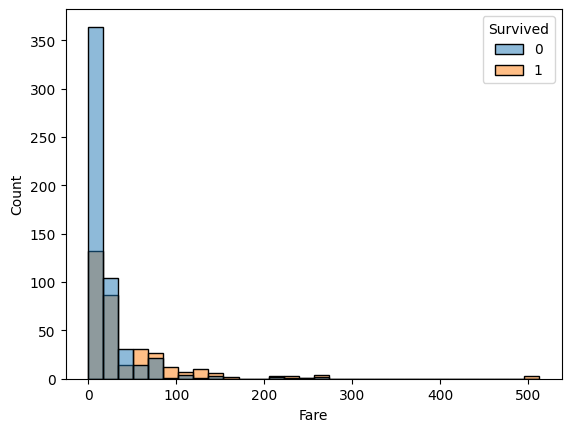

In [73]:
import seaborn as sns
sns.histplot(data=train, x='Fare', hue='Survived', bins=30)

In [74]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [75]:
train['Fare'] = np.log1p(train['Fare'])

In [76]:
train['Fare'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

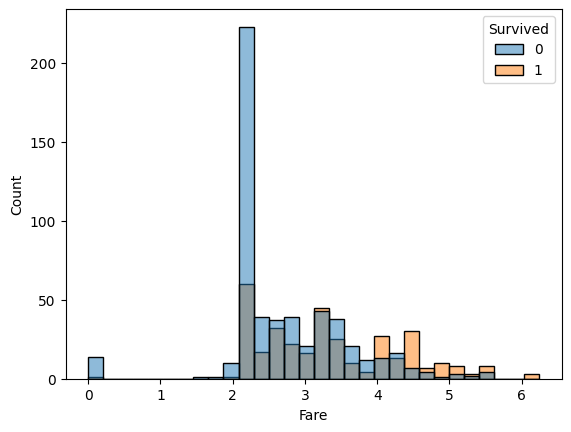

In [77]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=30)

In [78]:
# Fill missing Age with the median age *for each passenger class*
train["Age"] = train.groupby("Pclass")["Age"].transform(
    lambda x: x.fillna(x.median())
)

test["Age"] = test.groupby("Pclass")["Age"].transform(
    lambda x: x.fillna(x.median())
)


In [79]:
train.groupby("Pclass")["Age"].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [80]:
# Fill missing Fare with the median Fare for each passenger class
train["Fare"] = train.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)

test["Fare"] = test.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)


In [81]:
train.groupby("Pclass")["Fare"].median()

Pclass
1    4.115471
2    2.724445
3    2.202765
Name: Fare, dtype: float64

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Title        891 non-null    object 
 14  Deck         204 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [83]:
# Fill missing Embarked with the most common port per passenger class
train["Embarked"] = train.groupby("Pclass")["Embarked"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "S")
)

test["Embarked"] = test.groupby("Pclass")["Embarked"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "S")
)


In [84]:
train["Embarked"].isna().sum(), test["Embarked"].isna().sum()

(np.int64(0), np.int64(0))

In [85]:
train.groupby("Pclass")["Embarked"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)


Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object

<Axes: >

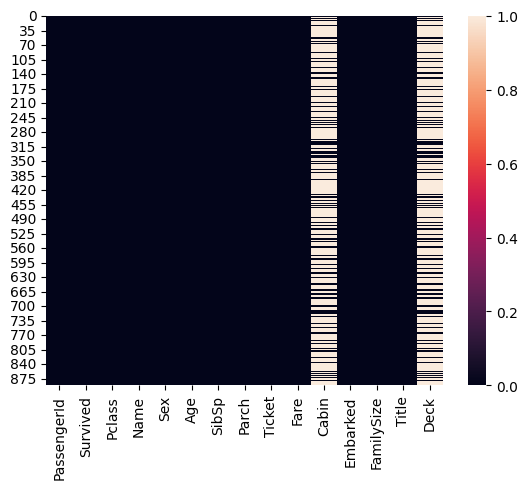

In [86]:
train.isnull().sum()
sns.heatmap(train.isnull(), )

In [87]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = train['Title'].value_counts().index[:6]
train['Title'] = train['Title'].where(train['Title'].isin(title_map),"Other")
train['Title'] = train['Title'].astype("category").cat.codes

In [88]:
# Choose the features you want to use
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = train[features].copy()
y = train["Survived"].copy()

# One-hot encode categorical columns so XGBoost gets numeric features
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)

X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,2.110213,True,False,True
1,1,38.0,1,0,4.280593,False,False,False
2,3,26.0,0,0,2.188856,False,False,True
3,1,35.0,1,0,3.990834,False,False,True
4,3,35.0,0,0,2.202765,True,False,True


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,   # keeps class balance similar in both splits
)


In [91]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_valid_pred = model.predict(X_valid)

acc = accuracy_score(y_valid, y_valid_pred)
print(f"Validation accuracy: {acc:.4f}")

print("\nConfusion matrix:")
print(confusion_matrix(y_valid, y_valid_pred))

print("\nClassification report:")
print(classification_report(y_valid, y_valid_pred))

Validation accuracy: 0.8101

Confusion matrix:
[[97 13]
 [21 48]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [95]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = train[features].copy()
y = train["Survived"].copy()

X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)

In [96]:
X_test = test[features].copy()
X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"], drop_first=True)

# Make sure columns line up with training features
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [97]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
)

final_model.fit(X, y)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [98]:
test_pred = final_model.predict(X_test)

In [99]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred.astype(int),
})


In [100]:
submission.to_csv("../reports/submission_xgb_v1.csv", index=False)


In [101]:
submission.to_csv("../submission_xgb_v1.csv", index=False)